In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ALL_MEDALISTS.csv', skiprows=4)
data.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# Task L10.1


### На какой дистанции Jesse Owens выйграл медаль?

In [3]:
data[data.Athlete=='OWENS, Jesse'].Event

6427            100m
6439            200m
6456    4x100m relay
6523       long jump
Name: Event, dtype: object

### Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? Отсортировать результат в алфавитном порядке по имени игрока.

In [4]:
#определение страны
data_select=data[(data.Medal=='Gold') & (data.Gender=='Men') & (data.Sport=='Badminton')]
all_country=data_select.NOC.value_counts()
first_country=all_country.keys()[0]
print("Country: ",first_country)

Country:  INA


In [5]:
#сортировка участников
data_select[data_select.NOC==first_country].sort_values(by='Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold
27726,Beijing,2008,Badminton,Badminton,"SETIAWAN, Hendra",INA,Men,doubles,M,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold
23702,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,M,Gold


### Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)? 

In [6]:
data[(data.Edition >= 1984) & (data.Edition <=2008)].NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

### Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [7]:
data_select1=data[ (data.Gender=='Men') & (data.Medal=='Gold') & (data.Event=='100m')].sort_values(by='Edition',ascending=False)
data_select1[['City','Edition','Athlete','NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


# Task L10.2

### Используя groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде. 

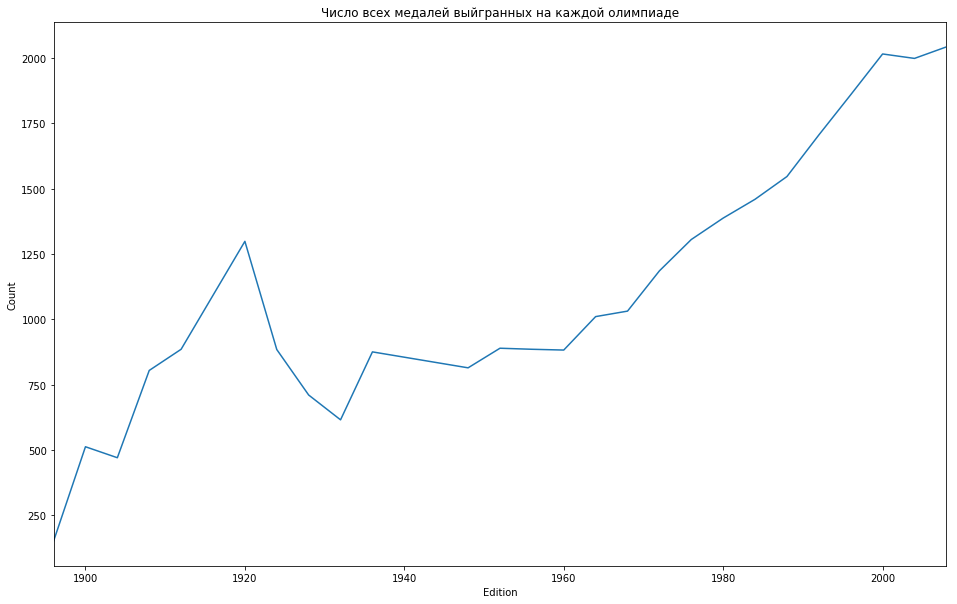

In [8]:
count_medal=data.groupby(['Edition']).size()

plt.figure(figsize=(16,10))
count_medal.plot()
plt.xlabel(u'Edition')
plt.ylabel(u'Count')
plt.title(u'Число всех медалей выйгранных на каждой олимпиаде')
plt.show()


###   Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [9]:
data_group=data.groupby(['NOC']).agg({'Edition' :['first','last','count']})


In [10]:
aa=data_group.Edition.sort_values(by='count',ascending=False)
aa

,first,last,count
NOC,,,
USA,1896,2008,4335
URS,1952,1988,2049
GBR,1896,2008,1594
FRA,1896,2008,1314
ITA,1900,2008,1228
GER,1896,2008,1211
AUS,1896,2008,1075
HUN,1896,2008,1053
SWE,1900,2008,1021


# Task L10.3

### Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

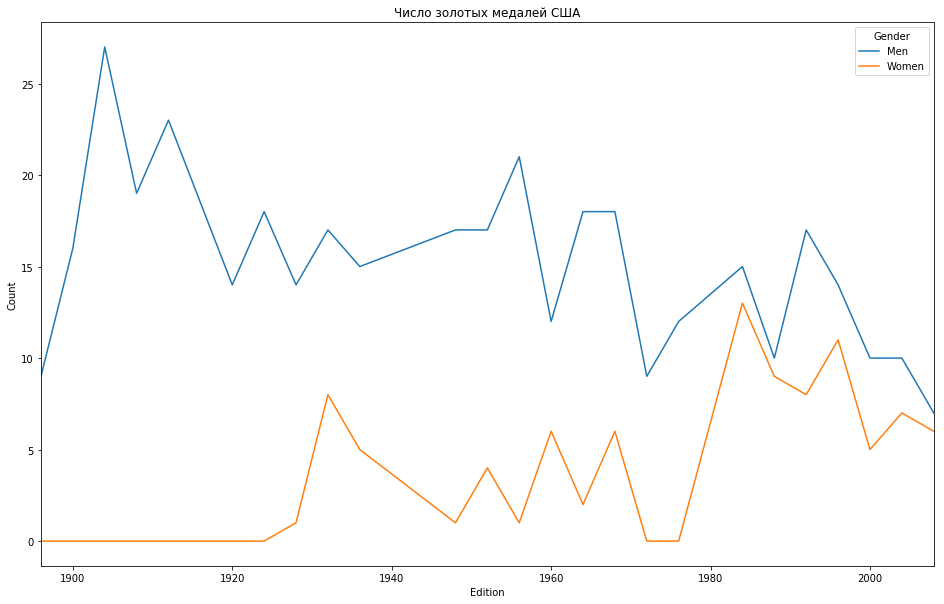

In [11]:
count_medal_usa = data[(data.NOC == 'USA') & (data.Sport=='Athletics') & (data.Medal=='Gold')]
count_medal_usa_group=count_medal_usa.groupby(['Edition','Gender']).size()



plt.figure(figsize=(16,10))
count_medal_usa_group.unstack('Gender',fill_value=0).plot(figsize=(16,10))
#plt.xlabel(u'Edition')
plt.ylabel(u'Count')
plt.title(u'Число золотых медалей США')
plt.show()



###  Постройте график 5 атлетов которые выйграли большинство золотых медалей.

In [12]:
more_medal = data[(data.Medal=='Gold')]

In [13]:
more_medal.groupby('Athlete').agg({'Medal':'count'}).sort_values(by='Medal',ascending=False).head(5)

,Medal
Athlete,
"PHELPS, Michael",14
"LATYNINA, Larisa",9
"NURMI, Paavo",9
"LEWIS, Carl",9
"SPITZ, Mark",9
